<a href="https://colab.research.google.com/github/Saqlain2/Data-Preprocessing-Using-PANDAS/blob/main/OUTLIER_TREATMENT_WITH_STD_DEV_AND_Z_SCORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("C:\\Users\\SaifzWorld.Lenovo-PC\\Desktop\\saqlain_csv\\height1.csv")

In [ ]:
df.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


Text(0.5, 0, 'count')

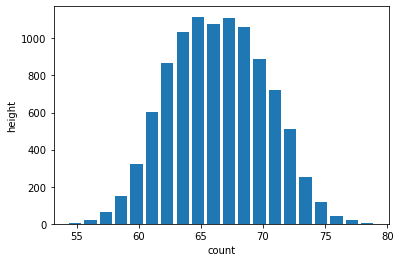

In [ ]:
plt.hist(df.Height,bins=20,rwidth=0.8)
plt.ylabel("height")
plt.xlabel("count")

In [ ]:
df.describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


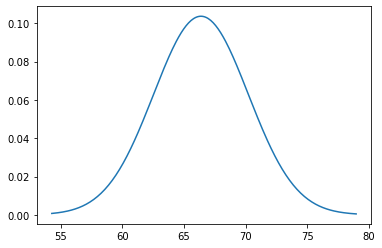

In [ ]:
#plotting guassian curve
from scipy.stats import norm

 
rng = np.arange(df.Height.min(),df.Height.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.Height.mean(),df.Height.std()))

In [ ]:
df.Height.min()

54.26313333

In [ ]:
df.Height.mean()

66.3675597548656

In [ ]:
df.Height.std()

3.847528120795573

In [ ]:
#will remove all outlier above 3 std deviasion because if distribution follow ,
#normal dist the 68% data will in 1st dev , 94% data will be in 2nd dev and 99% in 3rd std devb

In [ ]:
# its like "u+3sigma"
upper_limit = df.Height.mean() + 3*df.Height.std()
upper_limit

77.91014411725232

In [ ]:
# its like "u+3sigma"
lower_limit = df.Height.mean() - 3*df.Height.std()
lower_limit

54.824975392478876

In [ ]:
#now seeing the outlier 
df[(df.Height>upper_limit)|(df.Height<lower_limit)]


,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [ ]:
#df with removal of outlier
df_with_no_outlier = df[(df.Height<upper_limit) & (df.Height>lower_limit)]

df_with_no_outlier 

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [ ]:
 #removal of outlier using Z-SCORE   
    #   z = (x-μ)/σ
    # zscore = 3 then its 3std dev that is 99% lies between it

In [ ]:
df["zscore"] = ((df.Height - df.Height.mean())/(df.Height.std()))
df
df.drop(["z-score"],axis='columns', inplace=True)

In [ ]:
df[df['zscore']>3]

,Gender,Height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [ ]:
df[df['zscore']<-3]

,Gender,Height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [ ]:
df[(df.zscore>3)|(df.zscore<-3)]

,Gender,Height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [ ]:
df_with_no_outlier_usin_z_score = df[(df.zscore<3)&(df.zscore>-3)]
df_with_no_outlier_usin_z_score 

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [ ]:
#removal of outlier using percentile

In [ ]:
maxthreshold = df["Height"].quantile(0.999)
maxthreshold

77.06738853708

In [ ]:
df[df["Height"]>maxthreshold]

,Gender,Height,zscore
23,Male,75.205974,2.297167
190,Male,76.709835,2.688031
197,Male,75.944460,2.489105
202,Male,75.140821,2.280233
215,Male,74.795375,2.190449
...,...,...,...
4565,Male,75.690384,2.423068
4569,Male,77.547186,2.905665
4701,Male,76.732446,2.693908
4721,Male,75.330847,2.329622


In [ ]:
minthreshold = df["Height"].quantile(0.001)
minthreshold

56.066548911530006

In [ ]:
df3 = df[(df.Height>minthreshold)&(df.Height<maxthreshold)]
df3

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [ ]:
#now removing outlier using percentile on AIRBNB NEYWORK dataset

In [ ]:
df = pd.read_csv("C:\\Users\\SaifzWorld.Lenovo-PC\\Desktop\\saqlain_csv\\ab_nyc_2019.csv")
df.shape

(48895, 16)

In [ ]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [ ]:
minthreshold,maxthreeshold = df.price.quantile([0.01,0.99])
minthreshold,maxthreeshold

(30.0, 799.0)

In [ ]:
df2 =df[(df.price>minthreshold)&(df.price<maxthreeshold)]
df2.shape

(47744, 16)

In [ ]:
df2.sample(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5431,3928525,Stunning 2 bed 2bath Wall St. Luxury Apt,16101222,Andrew M.,Manhattan,Financial District,40.70563,-74.00878,Entire home/apt,275,3,9,2018-05-26,0.19,1,0
29271,22454765,Luxury studio in Astoria just by the water,13510515,Dimitri,Queens,Astoria,40.77179,-73.93442,Entire home/apt,200,4,0,NaN,NaN,1,0
42377,32890197,Brooklyn Room with 2 Chill Guys,175413,Angelo,Brooklyn,Bushwick,40.69835,-73.93258,Private room,33,2,3,2019-03-31,0.75,1,188
42552,33035945,Private hotel room in the heart of Times Square,4342052,Lea,Manhattan,Theater District,40.76089,-73.98709,Private room,299,1,22,2019-06-24,5.69,1,303
15484,12417189,Largest room in Astoria! Close to all mass tra...,13168457,Rob,Queens,Astoria,40.76555,-73.91458,Private room,70,2,18,2016-11-15,0.46,1,89
26136,20844601,Ocean Room at Great Location,137264725,Gulcin,Manhattan,Chinatown,40.71364,-73.99153,Private room,50,1,42,2019-06-19,1.91,4,257
13858,10478526,A cozy two bedroom apartment,16300728,Hamid,Brooklyn,Sunset Park,40.64953,-74.00011,Private room,40,2,9,2019-07-01,0.25,1,20
13429,10067924,Cozy & Lux Studio in Nolita,36866768,Lisa,Manhattan,Nolita,40.72238,-73.99631,Entire home/apt,179,7,0,NaN,NaN,1,0
11279,8743269,Studio: Heart of Harlem w backyard,12226733,Henna,Manhattan,Harlem,40.81132,-73.94496,Entire home/apt,95,2,1,2015-10-20,0.02,1,0
19016,15100883,New york Multi-unit building,95623284,Pablo,Bronx,Fordham,40.86533,-73.89713,Private room,40,3,1,2018-09-24,0.10,1,179
